# Derivations for the MAESTROeX Simplified-SDC Solver


In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.4 (Python 3.7.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



## Jacobian

We want to compute the Jacobian $\partial w/\partial \mathcal{U}$ with

$\mathcal{U} = (\rho X_\alpha, \rho X_\beta, \rho h, \rho)^\intercal$

$w = (\rho, X_\alpha, X_\beta, T)^\intercal$

We'll start by writing down

$A = \partial \mathcal{U}/\partial w$

and then find its inverse

In [2]:
r, h, Xa, Xb = symbols(r"rho h X_{\alpha} X_{\beta}")
dhdr, dhdT, dhdXa, dhdXb = symbols(r"\frac{\partial{}h}{\partial\rho} \frac{\partial{}h}{\partial{}T} " +
                                   r"\frac{\partial{}h}{\partial{}X_{\alpha}} \frac{\partial{}h}{\partial{}X_{\beta}}")

In [3]:
A = Matrix(
    [[Xa, r, 0, 0],
     [Xb, 0, r, 0],
     [h + r*dhdr, r*dhdXa, r*dhdXb, r*dhdT],
     [1, 0, 0, 0]])

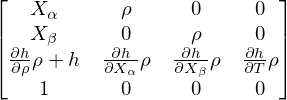

In [4]:
A

The inverse of $A$ is $\partial w/\partial \mathcal{U}$

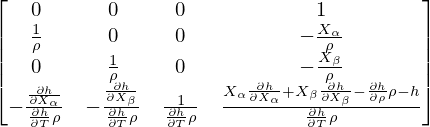

In [5]:
simplify(A.inv())